# Beleg 1: Bilddateien, Bilddarstellung und Bilddiskretisierung

**Name:** Jonas Wonneberger
<br>
**Matrikelnr.:** 0582006

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Do, 20.10.2022
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Do, 01.12.2022


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Viel Erfolg!

### Aufgabe 1: Grauwertbilder

In der ersten Aufgabe werden die wesentlichen Grundlagen von Bildern behandelt. Zunächst wird ein CT Bild im PNG Format eingelesen (`ct_image.png`) und die Bildmatrix untersucht. 

**Aufgabe 1.1**: Lesen Sie das Bild ein und visualisieren/plotten Sie es mit `pyplot` aus der `matplotlib` Library.

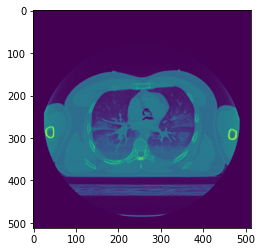

In [1]:
# 1.1

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('ct_image.png')
plt.imshow(img)

**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Breite und Höhe) in Pixel sowie den jeweils kleinsten und größten Wert im Bild aus.  

In [2]:
# 1.2
import cv2

pic = cv2.imread('ct_image.png')
print('Image Hight {}'.format(pic.shape[0])) # shape --> (512, 512, 3)
print('Image Width {}'.format(pic.shape[1]))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image Hight 512
Image Width 512
Maximum RGB value in this image 255
Minimum RGB value in this image 0


**Aufgabe 1.3**: Als nächstes soll das Bild in ein Grauwertbild transformiert werden (es hat zwar nur graue Farbtöne, liegt jedoch als RGB Bild vor und hat daher 3 Farbkanäle). Plotten Sie es erneut mit `pyplot` und achten Sie darauf, dass das Bild auch tatsächlich wie ein Grauwertbild aussieht.

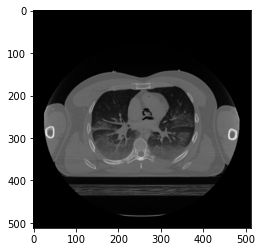

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('ct_image.png').convert("L") #pixel type greyscale
plt.imshow(image, cmap='gray')

**Aufgabe 1.4**: Als nächstes soll im CT Bild der schwarze Rand abgeschnitten werden, da dort keine Informationen über die aufgenommenen Strukturen zu finden sind. Zu diesem Zweck sollen Sie eine Bounding Box um den relevanten Bereich bestimmen. Dabei handelt es sich um ein Rechteck, dass sich über alle Bildbereiche erstreckt, in denen Inhalte zu finden sind (sie also nicht schwarz bzw. enthalten nicht den Wert 0). Nutzen Sie nun die gefundene Bounding Box, um das Bild entsprechend zuzuschneiden (oder auch zu "croppen").

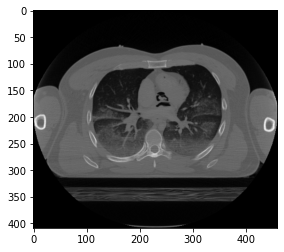

In [4]:
# 1.3

from PIL import Image

image=Image.open('ct_image.png')
imageBox = image.getbbox()
cropped=image.crop(imageBox)
plt.imshow(cropped, cmap='gray')



**Aufgabe 1.5**: Rotieren Sie das zugeschnittene Bild sowohl um 45° als auch um 90° und plotten Sie die rotierten Bilder.

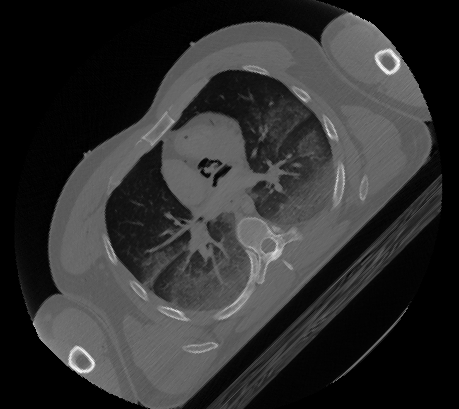

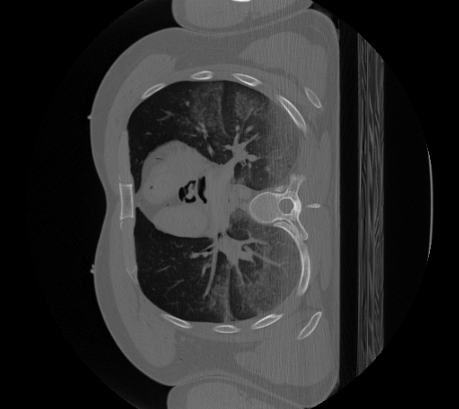

In [5]:
# 1.4


rotated_image45 = cropped.rotate(45)

rotated_image90 = cropped.rotate(90)

display(rotated_image45)
display(rotated_image90)


### Aufgabe 2: Farbbilder

In dieser Aufgabe werden Sie mit einem Farbbild (`mamma_tissue.png`) arbeiten. Dabei handelt es sich um eine Gewebeaufnahme einer Biopsie mit invasivem duktalem Mammakarzinom. 

**Aufgabe 2.1**: Lesen Sie das Bild sowohl mit OpenCV als auch mit Scikit-Image ein und visualisieren/plotten Sie es. Achten Sie dabei auf eine korrekte Darstellung des Bildes (zum Vergleich können Sie das Bild in einem Bildbetrachtungsprogramm Ihrer Wahl öffnen). 

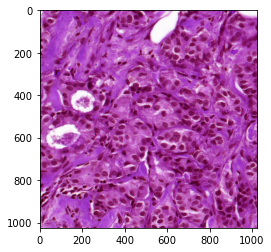

In [6]:

# 2.1

import cv2
import matplotlib.pyplot as plt
filename = "mamma_tissue.png"
image = cv2.imread(filename)
plt.imshow(image)


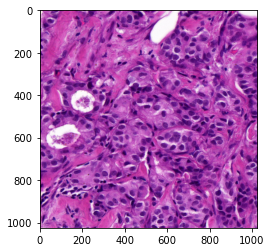

In [7]:
from skimage import io
mamma2 = io.imread("mamma_tissue.png")
plt.imshow(mamma2)

**Aufgabe 2.2**: Zerlegen Sie das Bild in seine einzelnen Farbkanäle für Rot, Grün und Blau. Zeigen Sie in einer gemeinsamen Grafik sowohl das Farbbild, als auch die drei einzelnen Farbkanäle.

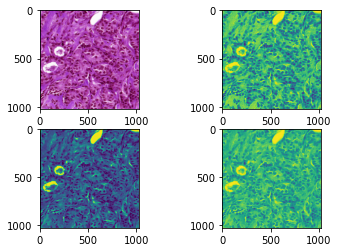

In [65]:
# 2.2
import cv2
from matplotlib import pyplot as plt


img = cv2.imread("mamma_tissue.png")
b,g,r = cv2.split(img)       # get b,g,r as array

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img)
axarr[0,1].imshow(r)
axarr[1,0].imshow(g)
axarr[1,1].imshow(b)

 **Aufgabe 2.3**: Führen Sie eine Farbquantisierung (also eine Reduktion der im Bild vorkommenden Farben) auf dem Bild durch. Plotten Sie das Ergebnis mit 2, 4, 8 und 16 Farben. Sie können hierzu einen der in der Vorlesung vorgestellten Algorithmen (Median Cut und Fehlerdiffusion) verwenden. Die Abgabe wird aber auch abgenommen, wenn die Reduktion mithilfe einer der gängigen Bildverarbeitungs-Librarys durchgeführt wird.

In [9]:
from skimage import io
from sklearn.cluster import KMeans

def colorQuantization(n_colors):
    original = io.imread('mamma_tissue.png')

    arr = original.reshape((-1, 3)) # creating an array of 3 columns corresponding to R, G, B values off all the pixels
    kmeans = KMeans(n_clusters=n_colors, random_state=1).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_ # get color values
    less_colors = centers[labels].reshape(original.shape).astype('uint8')

    io.imshow(less_colors)

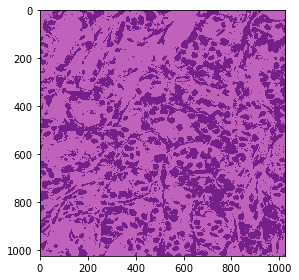

In [10]:
colorQuantization(2)

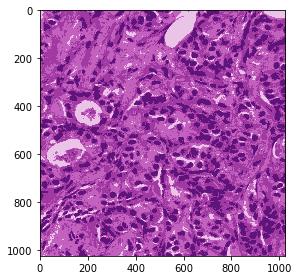

In [11]:
colorQuantization(4)

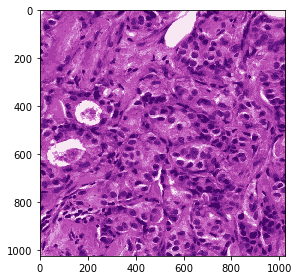

In [12]:
colorQuantization(8)

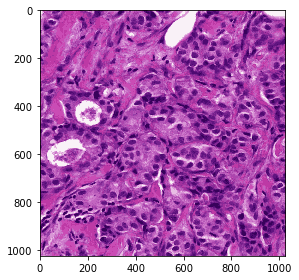

In [13]:
colorQuantization(16)

**Aufgabe 2.4**: Lesen Sie die Größe des Originalbildes ein und geben sie mit einer `print`-Anweisung aus. Anschließend verkleinern Sie das Bild auf 128x128 Pixel und plotten es. Schließlich skalieren Sie das verkleinerte Bild wieder auf die Originalgröße und plotten es erneut.

(1025, 1025)


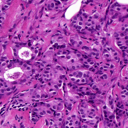

In [14]:
# 2.4
from PIL import Image

image = Image.open('mamma_tissue.png')

print(image.size)

x = image.resize((128, 128))
display(x)

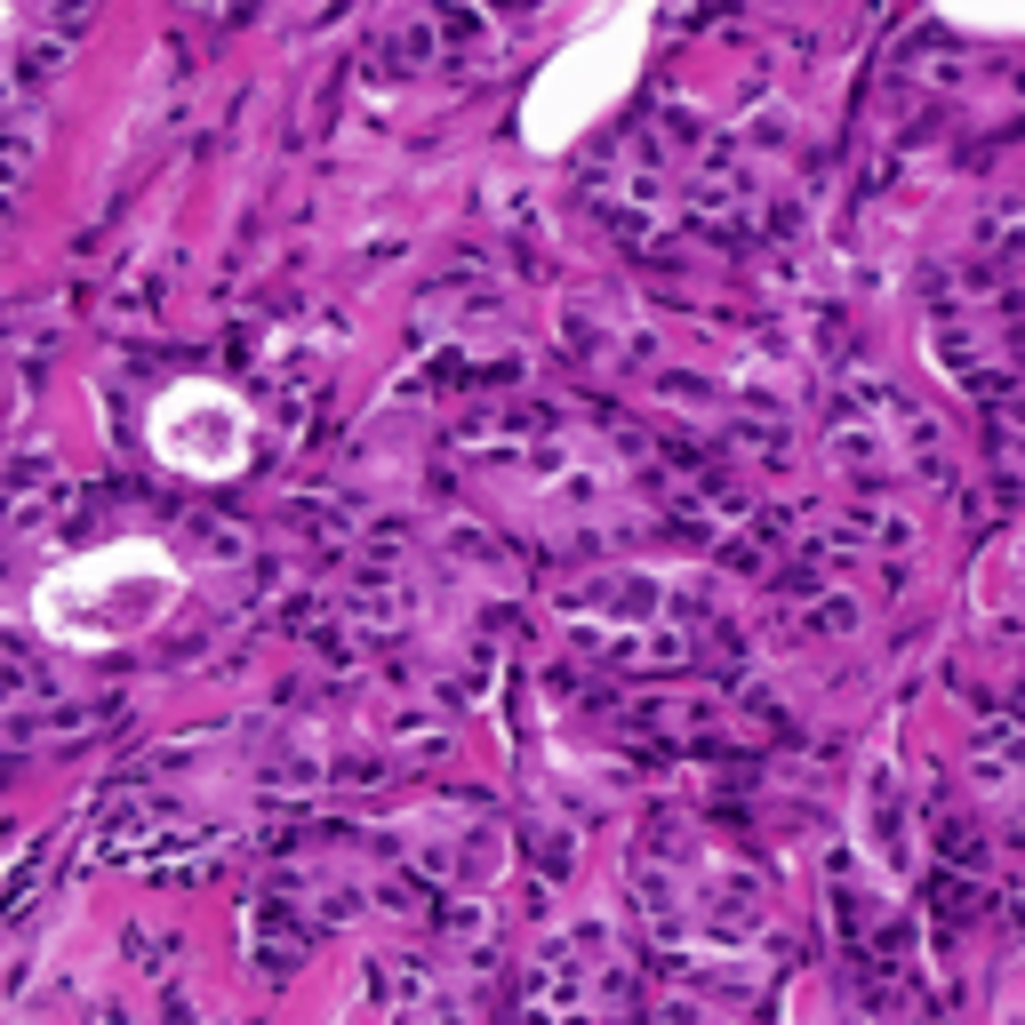

In [15]:
newX = x.resize((1025, 1025))
display(newX)

**Aufgabe 2.5**: Lesen die das Bild ein und konvertieren Sie es in den HSV Raum. Setzen Sie mit hilfe des HSV Farbmodells alle Pixel auf 0, die nicht Teil eines Zellkerns sind. Beschreiben Sie dabei in einem kurzen Fließtext, was Sie sich bei Ihrer Vorgehensweise gedacht haben. 

*Hinweis: Für die Abnhame dieser Teilaufgabe wird kein perfektes Ergebnis erwartet. Viel eher sollen Sie zeigen, dass Sie das Grundprinzip des HSV Farbmodells verstanden und auf die gegebene Problemstellung anwenden können.*

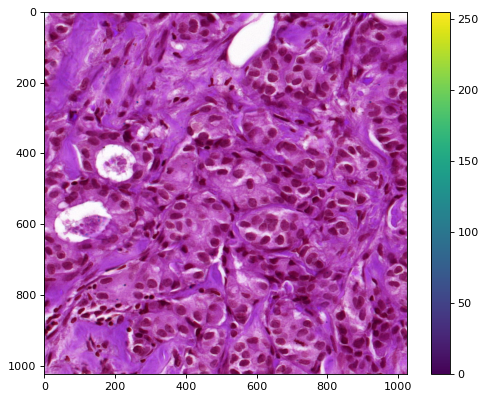

In [60]:
#Zuerst habe ich herausfinden wollen, welche Farbbereich im Bild nicht auf Schwarz setzen wollte. Anschließend habe ich den unteren Farbbereich und den Oberefarbbereich festgelegt den ich im HSV Farbmodell nicht abdunkeln wollte(https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv). Als ich den passenden bereich gefunden habe, habe ich eine Maske erstellt und diese anschließend über das Orginal Bild gelegt.


plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(image)
plt.colorbar();

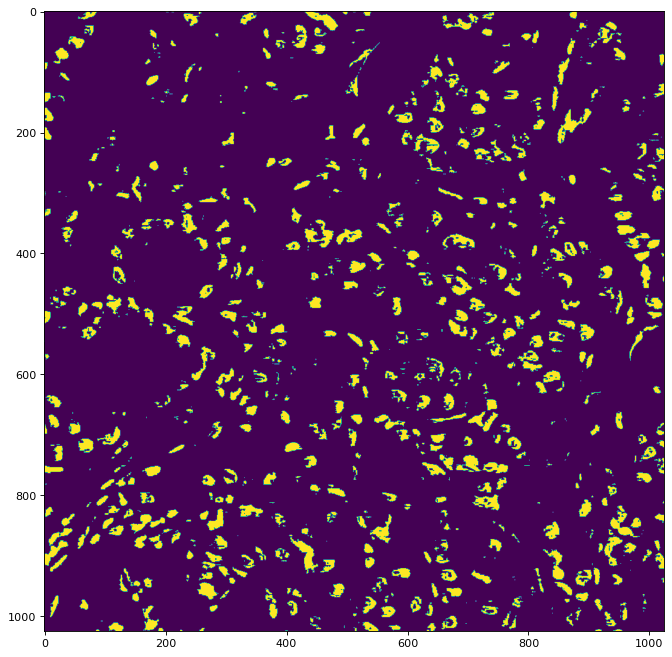

In [62]:
import cv2
import numpy as np


original = cv2.imread('mamma_tissue.png')

hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

lower_colors = np.array([50, 150, 20])
upper_colors = np.array([140, 255, 255])

mask =  cv2.inRange(hsv, lower_colors, upper_colors)
res = cv2.bitwise_and(original, original, mask=mask)

plt.figure(num=None, figsize=(10, 12), dpi=80)
plt.imshow(mask)

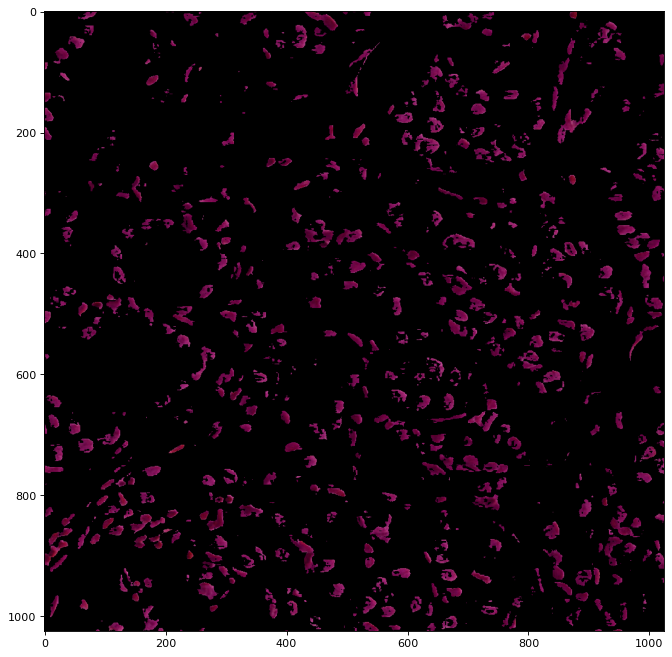

In [63]:
plt.figure(num=None, figsize=(10, 12), dpi=80)
plt.imshow(res)